# Cross Selling
What is cross selling? Cross selling is the ability to sell more products to a customer by analyzing the customer’s shopping trends as well as general shopping trends and patterns which are in common with the customer’s shopping patterns. 


## Market Basket Analysis with Association Rule-Mining
The whole concept of association rule-mining is based on the concept that customer purchase behavior has a pattern which can be exploited for selling more items to the customer in the future.

we can use these rules to develop bundles of products which make it convenient for the customer to buy these items together. Another way to use these rules is to bundle products along with some discounts for other relevant products in the bundle, hence ensuring that the customer becomes more likely to buy more items.

There are some vital concepts pertaining to association rule-mining and they are:

1. <b>Itemset:</b> Itemset is just a collection of one or more items that occur together in a transaction. For example, here {milk, bread} is example of an itemset.

2. <b>Support:</b> Support is defined as number of times an itemset appears in the dataset. Mathematically it is defined as:

<b>supp ( { beer , diaper } )</b> =
number of transactions with beer and diaper / 
total transactions

3. <b>Confidence:</b> Confidence is a measure of the times the number of times a rule is found to exist in the dataset. For a rule which states { beer ® diaper } the confidence is mathematically definedas:

<b>confidence ( { beer , diaper } )</b> =
supp ( beer and diaper )
supp ( beer )

4. <b>Lift:</b> Lift of the rule is defined as the ratio of observed support to the support expected in the case the elements of the rule were independent. For the previous set of transactions if the rule is defined as { X ® Y } , then the lift of the rule is defined as:

<b>lift ( X ® Y )</b> = supp ( X <b>U</b> Y )/
( supp ( X ) * supp ( Y ) )

5. <b>Frequent itemset:</b> Frequent itemsets are itemsets whose support is greater than a user defined support threshold.

## FP Growth Algorithm

1. Take in the transactional database and create an FP-tree structure to represent frequent itemsets.

2. Divide this compressed representation into multiple conditional datasets such that each one is associated with a frequent pattern.

3. Mine for patterns in each such dataset so that shorter patterns can be recursively concatenated to longer patterns, hence making it more efficient.

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import Orange
from Orange.data import Domain, DiscreteVariable, ContinuousVariable
from orangecontrib.associate.fpgrowth import *
%matplotlib inline

/home/emmyvera/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Exploratory Data Analysis



In [2]:
grocery_items = set()

with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        grocery_items.update(line)
output_list = list()
with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row_val = {item:0 for item in grocery_items}
        row_val.update({item:1 for item in line})
        output_list.append(row_val)

This code above gives us a dataframe of dimension (num_transaction,total_items), where each transaction row has columns corresponding to its constituent items as 1.

This data structure is sparse, meaning it has a lot of zeros, our framework that extracts association rules will take care of this
sparseness.

In [3]:
grocery_df = pd.DataFrame(output_list)

In [4]:
grocery_df.head()

,liquor (appetizer),pork,candy,frozen dessert,spread cheese,liqueur,zwieback,make up remover,hard cheese,semi-finished bread,...,nut snack,pudding powder,specialty fat,fruit/vegetable juice,beverages,jam,mustard,curd,sugar,sauces
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
grocery_df.shape

(9835, 169)

In [6]:
total_item_count = sum(grocery_df.sum())
print(total_item_count)
item_summary_df = grocery_df.sum().sort_values(ascending = False).reset_index().head(n=20)
item_summary_df.rename(columns={item_summary_df.columns[0]:'item_name',
                                item_summary_df.columns[1]:'item_count'}, inplace=True)
item_summary_df.head(10)

43367


,item_name,item_count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


Text(0.5, 1.0, 'Item sales distribution')

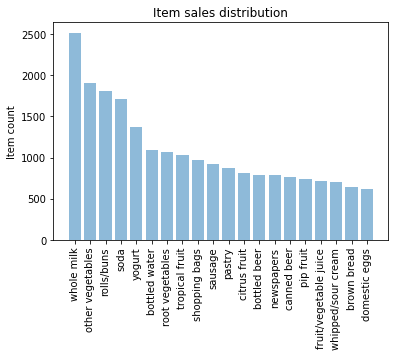

In [7]:
objects = (list(item_summary_df['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary_df['item_count'].head(n=20))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

In [8]:
item_summary_df['item_perc'] = item_summary_df['item_count']/total_item_count
item_summary_df['total_perc'] = item_summary_df.item_perc.cumsum()
item_summary_df.head(20)

,item_name,item_count,item_perc,total_perc
0,whole milk,2513,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542
3,soda,1715,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725
5,bottled water,1087,0.025065,0.239791
6,root vegetables,1072,0.024719,0.264510
7,tropical fruit,1032,0.023797,0.288307
8,shopping bags,969,0.022344,0.310651
9,sausage,924,0.021307,0.331957


This code above shows us how much percentage of total sales is explained by these 20 items alone. We used the cumulative sum function offered by pandas (cumsum) to find this out. 
We created two columns in our dataframe. One will tell how much percentage of total sales can be attributed to a particular item and the other will keep a cumulative sum of this sales percentage.

This shows us that the top five items are responsible for 21.4% of the entire sales and only the top 20 items are responsible for over 50% of the sales! 

This is important for us, as we don’t want to find association
rules for items which are bought very infrequently. 

With this information we can limit the items we want to explore for creating our association rules. This also helps us in keeping our possible itemset number to a manageable figure.

## Orange


In [9]:
input_assoc_rules = grocery_df
domain_grocery = Domain([DiscreteVariable.make(name=item, values=['0', '1']) for item in input_assoc_rules.columns])

In [10]:
data_gro_1 = Orange.data.Table.from_numpy(domain=domain_grocery, X=input_assoc_rules.values,Y= None)

### Using the FP Growth Algorithm

We need to prune our dataset to reduce the number of item in our sales dataset. For this we have created a function prune_dataset, which will help us reduce the size of our dataset based on our requirements. The function can be used for performing two types of pruning 

1. <b>Pruning based on percentage of total sales:</b> The parameter total_sales_perc will help us select the number of items that will explain the required percentage of sales. The default value is 50% or 0.5.

2. <b>Pruning based on ranks of items:</b> Another way to perform the pruning is to specify the starting and the ending rank of the items for which we want to prune our dataset.

In [12]:
output_df, item_counts = prune_dataset(input_df=grocery_df, length_trans=2,total_sales_perc=0.4)
print(output_df.shape)
print(list(output_df.columns))

(4585, 13)
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer']


In [13]:
input_assoc_rules = output_df
domain_grocery = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_assoc_rules.columns])
data_gro_1 = Orange.data.Table.from_numpy(domain=domain_grocery,  X=input_assoc_rules.values,Y= None)
data_gro_1_en, mapping = OneHot.encode(data_gro_1, include_class=False)

This cell above, this is required for coding our input so that the entire domain is represented as binary variables. This will complete all the parsing and data manipulation required for our rule-mining.


The final step is creating our rules. We need to specify two pieces of information for generating our rules: support and confidence. An important piece of information is to start with a higher support, as lower support will mean a higher number of frequent itemsets and hence a longer execution time. So We specified a min-support of 0.01—45 transactions at least—and see the number of frequent itemsets that we get before we specify confidence and generate our rules.

In [14]:
min_support = 0.01
print("num of required transactions = ", int(input_assoc_rules.shape[0]*min_support))
num_trans = input_assoc_rules.shape[0]*min_support
itemsets = dict(frequent_itemsets(data_gro_1_en, min_support=min_support))


num of required transactions =  45


In [15]:
len(itemsets)

166886

So we got a whopping 166,886 itemsets for a support of only 1%! This will increase exponentially if we decrease the support or if we increase the number of items in our dataset. The next step is specifying a confidence value and generating our rules.

In [16]:
confidence = 0.3
rules_df = pd.DataFrame()

if len(itemsets) < 1000000: 
    rules = [(P, Q, supp, conf)
    for P, Q, supp, conf in association_rules(itemsets, confidence)
       if len(Q) == 1 ]

    names = {item: '{}={}'.format(var.name, val)
        for item, var, val in OneHot.decode(mapping, data_gro_1, mapping)}
    
    eligible_ante = [v for k,v in names.items() if v.endswith("1")]
    
    N = input_assoc_rules.shape[0]
    
    rule_stats = list(rules_stats(rules, itemsets, N))
    
    rule_list_df = []
    for ex_rule_frm_rule_stat in rule_stats:
        ante = ex_rule_frm_rule_stat[0]            
        cons = ex_rule_frm_rule_stat[1]
        named_cons = names[next(iter(cons))]
        if named_cons in eligible_ante:
            rule_lhs = [names[i][:-2] for i in ante if names[i] in eligible_ante]
            ante_rule = ', '.join(rule_lhs)
            if ante_rule and len(rule_lhs)>1 :
                rule_dict = {'support' : ex_rule_frm_rule_stat[2],
                             'confidence' : ex_rule_frm_rule_stat[3],
                             'coverage' : ex_rule_frm_rule_stat[4],
                             'strength' : ex_rule_frm_rule_stat[5],
                             'lift' : ex_rule_frm_rule_stat[6],
                             'leverage' : ex_rule_frm_rule_stat[7],
                             'antecedent': ante_rule,
                             'consequent':named_cons[:-2] }
                rule_list_df.append(rule_dict)
    rules_df = pd.DataFrame(rule_list_df)
    print("Raw rules data frame of {} rules generated".format(rules_df.shape[0]))
    if not rules_df.empty:
        pruned_rules_df = rules_df.groupby(['antecedent','consequent']).max().reset_index()
    else:
        print("Unable to generate any rule")

Raw rules data frame of 16628 rules generated


In [17]:
(pruned_rules_df[['antecedent','consequent',
                  'support','confidence','lift']].groupby('consequent')
                                                 .max()
                                                 .reset_index()
                                                 .sort_values(['lift', 'support','confidence'],
                                                ascending=False))

,consequent,antecedent,support,confidence,lift
4,root vegetables,"yogurt, tropical fruit",228,0.463636,2.230611
5,sausage,"shopping bags, rolls/buns",59,0.393162,2.201037
8,tropical fruit,"yogurt, root vegetables",92,0.429907,2.156588
1,citrus fruit,"whole milk, other vegetables, tropical fruit",66,0.333333,2.125637
10,yogurt,"whole milk, tropical fruit",199,0.484211,1.891061
2,other vegetables,"yogurt, whole milk, tropical fruit",228,0.643836,1.826724
6,shopping bags,"soda, sausage",50,0.304878,1.782992
0,bottled water,"yogurt, soda",59,0.333333,1.707635
9,whole milk,"yogurt, tropical fruit",228,0.754098,1.703222
3,rolls/buns,"yogurt, tropical fruit",97,0.522222,1.679095


### Interpretation:

{ yogurt , whole milk , tropical fruit => root vegtables }

The pattern that the rule states in the equation is easy to understand—people who bought yogurt, whole milk, and tropical fruit also tend to buy root vegetables. Let’s try to understand the metrics. 

Support of the rule is 228, which means, all the items together appear in 228 transactions in the dataset. 

Confidence of the rule is 46%, which means that 46% of the time the antecedent items occurred we also had the consequent in the transaction (i.e. 46% of times, customers who bought the left side items also bought root vegetables).

Another important metric is Lift. Lift means that the probability of finding root vegetables in the transactions which have yogurt, whole milk, and tropical fruit is greater than the normal probability of finding root vegetables in the previous transactions (2.23).


Typically, a lift value of 1 indicates that the probability of occurrence of the antecedent and consequent together are independent of each other. 

Hence,the idea is to look for rules having a lift much greater than 1. In our case, all the previously mentioned rules are good quality rules.

This is a significant piece of information, as this can prompt a retailer to bundle specific products like these together or run a marketing scheme that offers discount on buying root vegetables along with these other three products.